# Bias Variance

## Import stuff

We'll need: pandas, numpy, matplotlib, sklearn.

In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Get the data

Dataset URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [267]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Import stuff for Train-Test Split

We'll need: train_test_split

In [268]:
from sklearn.cross_validation import train_test_split

Determine X_train, X_test, y_train, y_test using sklearn.

In [269]:
# determine X and y
X = df.drop('class', axis=1)
y = df['class']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Import stuff for kNN

We'll need: KNeighborsClassifier, accuracy_score.

In [270]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## High Bias

Let's start by training a K Nearest Neighbors classifier with high bias.

In [271]:
knn = KNeighborsClassifier(n_neighbors=90)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.25


#### What happened here?

We underfit the data by looking at too many neighbors for each datapoint (too general). This fits neither the training set nor the test set very well.

Now let's train a K Nearest Neighbors classifier with high variance.

In [272]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.95


#### What happened here?

We overfit the data by looking at too few neighbors for each datapoint (too specific). This might fit the training set well but does not generalize to the test set.

Can we do better? Try experimenting with the value of K.

In [280]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.966666666667


#### What happened here?

We chose a value of K that is somewhere in between high bias and high variance.

#### Explain the Bias-Variance tradeoff.

Increasing K will decrease variance and increase bias. Decreasing K will increase variance and decrease bias. We would like to find a point in the middle that optimizes our classifier's performance.

#### How do bias and variance affect training and testing error?

If we underfit (high bias), our classifier performs poorly on both the training and testing data. If we overfit (high variance), our classifier may perform well on the training data, but performs poorly on the testing data.

# K-Fold Cross Validation

#### What is K-Fold Cross Validation?

K-fold cross validation partitions the data into K subsamples and trains and evaluates on each of those. This allows us to evaluate the model's ability to generalize to unseen data and reduces the chances of overfitting.

#### How can we use K-Fold Cross Validation to determine the optimal value of K to use in kNN?

We can fix different values of K (number of neighbors) in each fold of cross validation and choose the value of K that maximizes the accuracy.

## Import stuff for K-Fold Cross Validation

We'll need: cross_val_score.

In [274]:
from sklearn.model_selection import cross_val_score

Now let's use cross validation to tune the hyperparameter K (the number of neighbors to consider). We want to choose the value of K that gives the best accuracy.

In [275]:
# list of possible K-values for KNN
k_values = [i for i in range(1, 50)]

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
cv_scores

[0.93138888888888882,
 0.93027777777777776,
 0.93027777777777776,
 0.91777777777777769,
 0.96638888888888874,
 0.96500000000000008,
 0.96638888888888874,
 0.95138888888888895,
 0.97638888888888897,
 0.94138888888888883,
 0.95388888888888879,
 0.94138888888888883,
 0.95388888888888879,
 0.94138888888888883,
 0.95388888888888879,
 0.93000000000000005,
 0.91888888888888887,
 0.93000000000000005,
 0.91888888888888887,
 0.91888888888888887,
 0.91888888888888887,
 0.9063888888888888,
 0.91888888888888887,
 0.91750000000000009,
 0.9063888888888888,
 0.9063888888888888,
 0.91888888888888887,
 0.9063888888888888,
 0.9063888888888888,
 0.9063888888888888,
 0.93138888888888882,
 0.90777777777777779,
 0.91888888888888887,
 0.9063888888888888,
 0.91888888888888887,
 0.89527777777777773,
 0.9063888888888888,
 0.89527777777777773,
 0.9063888888888888,
 0.9063888888888888,
 0.92888888888888876,
 0.91979797979797984,
 0.8150252525252526,
 0.79252525252525241,
 0.65530303030303028,
 0.64530303030303027,

Plot the accuracy of the classifier for each value of K.

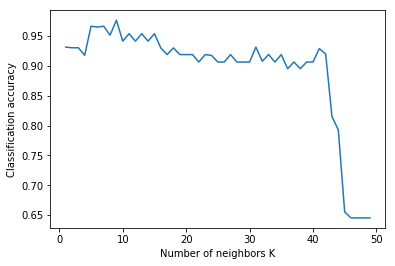

In [276]:
plt.plot(k_values, cv_scores)
plt.xlabel('Number of neighbors K')
plt.ylabel('Classification accuracy')
plt.show()

What is the optimal value of K found using 10-fold cross validation?

In [277]:
print(cv_scores.index(max(cv_scores)) + 1)

9


#### Explain stratified cross validation.

Stratified cross validation ensures that each subset of the data is representative of the data as a whole.

# Grid Search

#### What is Grid Search?

Grid Search takes a family of models (with different combinations of parameter values) and selects the best-performing one using cross validation.

## Import stuff for GridSearch

We'll need: GridSearchCV.

In [278]:
from sklearn.grid_search import GridSearchCV

Try using GridSearch to determine the optimal value of K.

In [279]:
# list of possible k values for KNN
k_values = list(range(1, 50))

parameters = dict(n_neighbors=k_values)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, parameters, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_params_)

{'n_neighbors': 9}
